In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire
from pydataset import data
from env import get_db_url
import seaborn as sns
from scipy import stats

In [2]:
df_iris = data('iris')
print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [3]:
print(df_iris.shape)

(150, 5)


In [4]:
print(df_iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [5]:
print(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [6]:
print(df_iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1iYJPktqfAanL0dKg1jLXBtO1bk9H0b5zTFrDpFPU9Nk/export?format=csv&gid=1023018493'
df_google_sheets = pd.read_csv(sheet_url)
df_google_sheets_sample = df_google_sheets.head(100)

In [8]:
len(df_google_sheets)

7049

In [9]:
print(df_google_sheets.columns[:5])

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')


In [10]:
print(df_google_sheets.select_dtypes(include=['object']).columns)

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')


In [11]:
columns_with_num = df_google_sheets.select_dtypes(include =['float', 'int'])
range_for_gs = columns_with_num.max() - columns_with_num.min()
range_for_gs

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
tenure                 79.3
dtype: float64

In [12]:
df_excel = pd.read_excel('spreadsheet_exercises.xlsx', sheet_name = 'Table1_CustDetails')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes,3.187128


In [13]:
df_excel_sample = df_excel.head(100)

In [14]:
print(df_excel.shape)

(7049, 13)


In [15]:
print(df_excel.columns[:5])

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')


In [16]:
print(df_excel.select_dtypes(include=['object']).columns)

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')


In [17]:
columns_with_num_excel = df_excel.select_dtypes(include =['float', 'int'])
range_for_excel = columns_with_num.max() - columns_with_num.min()
range_for_excel

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
tenure                 79.3
dtype: float64

In [77]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357' 

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
df_google.shape

(891, 12)

In [80]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [85]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:

for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col}: {df_google[col].nunique()} unique values')

Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [19]:
from acquire import get_titanic_data

In [20]:
df_titanic = get_titanic_data()
df_titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [21]:
from acquire import get_iris_data

In [22]:
df_iris = get_iris_data()
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [23]:
from acquire import get_telco_data

In [24]:
df_telco = get_telco_data()
df_telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')


import acquire

In [124]:
from acquire import get_iris_data

In [134]:
df = get_iris_data()
df.head()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


In [135]:
columns_to_drop = ['species_id', 'Unnamed: 0','measurement_id']

In [136]:
df = df.drop(columns = columns_to_drop)


In [137]:
df.rename(columns = {'species_name':'species'}, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [138]:
dummy_df = pd.get_dummies(df[['species']],dummy_na=False, drop_first=[True])
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [139]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [140]:
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [143]:
train.shape, test.shape, validate.shape

((84, 7), (30, 7), (36, 7))

<AxesSubplot:>

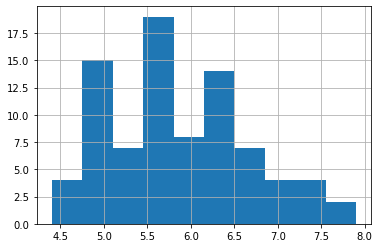

In [148]:
train.sepal_length.hist()

<AxesSubplot:>

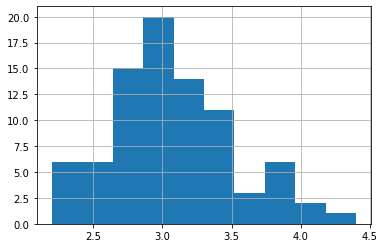

In [149]:
train.sepal_width.hist()

<AxesSubplot:>

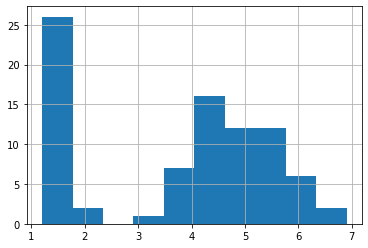

In [150]:
train.petal_length.hist()

<AxesSubplot:>

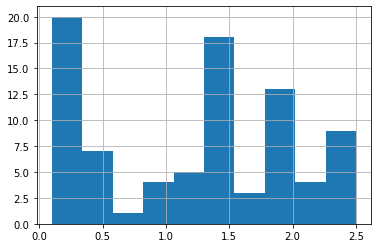

In [151]:
train.petal_width.hist()

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

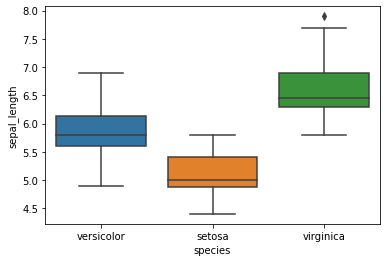

In [160]:
sns.boxplot(x="species", y="sepal_length", data=train)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

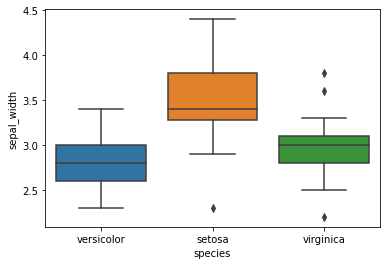

In [161]:
sns.boxplot(x="species", y="sepal_width", data=train)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

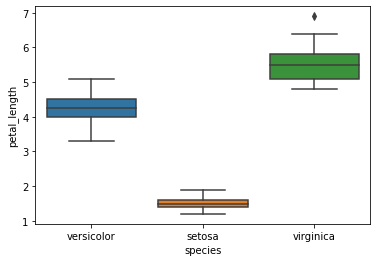

In [162]:
sns.boxplot(x="species", y="petal_length", data=train)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

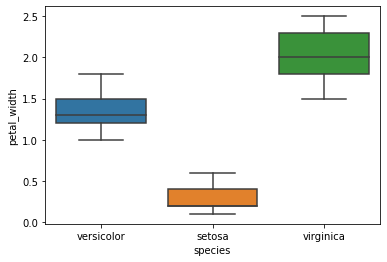

In [163]:
sns.boxplot(x="species", y="petal_width", data=train)

In [165]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5
species_versicolor,84.0,0.333333,0.474236,0.0,0.000,0.00,1.0,1.0
species_virginica,84.0,0.333333,0.474236,0.0,0.000,0.00,1.0,1.0


In [190]:
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

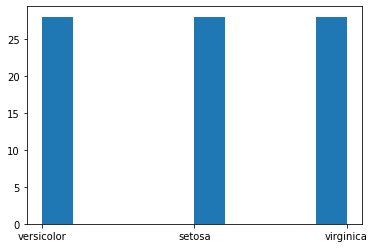

In [193]:
plt.hist(train.species)

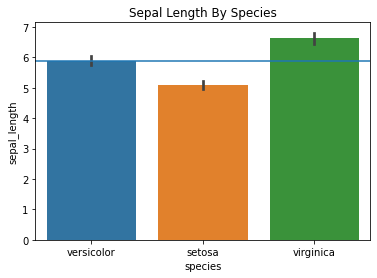

In [194]:
plt.title('Sepal Length By Species')
sns.barplot(x="species", y="sepal_length", data=train)
plt.axhline(train.sepal_length.mean())


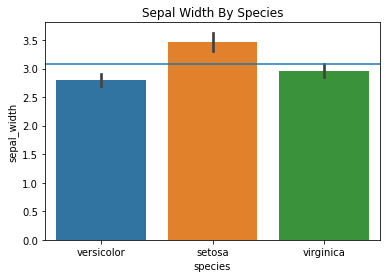

In [195]:
plt.title('Sepal Width By Species')
sns.barplot(x="species", y="sepal_width", data=train)
plt.axhline(train.sepal_width.mean())

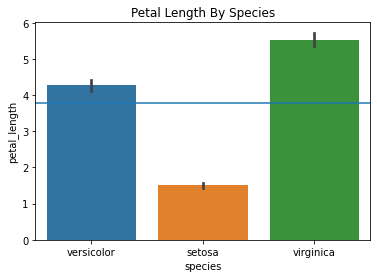

In [196]:
plt.title('Petal Length By Species')
sns.barplot(x="species", y="petal_length", data=train)
plt.axhline(train.petal_length.mean())

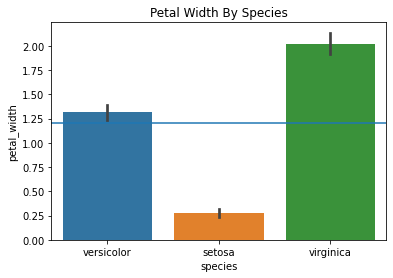

In [197]:

plt.title('Petal Width By Species')
sns.barplot(x="species", y="petal_width", data=train)
plt.axhline(train.petal_width.mean())

In [203]:
train[train.species == "setosa"].describe().T[0:4]

,count,mean,std,min,25%,50%,75%,max
sepal_length,28.0,5.089286,0.360390,4.4,4.875,5.0,5.4,5.8
sepal_width,28.0,3.467857,0.427788,2.3,3.275,3.4,3.8,4.4
petal_length,28.0,1.507143,0.184448,1.2,1.400,1.5,1.6,1.9
petal_width,28.0,0.275000,0.120570,0.1,0.200,0.2,0.4,0.6


In [204]:
train[train.species == "versicolor"].describe().T[0:4]

,count,mean,std,min,25%,50%,75%,max
sepal_length,28.0,5.896429,0.425556,4.9,5.6,5.80,6.125,6.9
sepal_width,28.0,2.796429,0.280848,2.3,2.6,2.80,3.000,3.4
petal_length,28.0,4.271429,0.409930,3.3,4.0,4.25,4.525,5.1
petal_width,28.0,1.314286,0.199470,1.0,1.2,1.30,1.500,1.8


In [202]:
train[train.species == "virginica"].describe().T[0:4]

,count,mean,std,min,25%,50%,75%,max
sepal_length,28.0,6.625000,0.532378,5.8,6.3,6.45,6.9,7.9
sepal_width,28.0,2.960714,0.318956,2.2,2.8,3.00,3.1,3.8
petal_length,28.0,5.535714,0.496815,4.8,5.1,5.50,5.8,6.9
petal_width,28.0,2.021429,0.293582,1.5,1.8,2.00,2.3,2.5


In [219]:
alpha = .05
# null hypothesis: Petal width of verisicolor >= petal width of virginica
# alt hypothesis: Petal width of verisicolor < petal width of virginica
# follow same hypothesis for each measurement type

In [182]:
versicolor = train[train.species == 'versicolor']
virginica = train[train.species == 'virginica']
setosa = train[train.species == 'setosa']

In [220]:
t, p = scipy.stats.mannwhitneyu(versicolor.petal_width, virginica.petal_width, alternative="less")
p

3.235595834904965e-10

In [221]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


In [228]:
t, p = scipy.stats.mannwhitneyu(versicolor.petal_length, virginica.petal_length, alternative="less")
p

1.4739917857575313e-10

In [229]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


In [230]:
t, p = scipy.stats.mannwhitneyu(versicolor.sepal_length, virginica.sepal_length, alternative="less")
p

1.541014598267054e-06

In [231]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


In [232]:
t, p = scipy.stats.mannwhitneyu(versicolor.sepal_width, virginica.sepal_width, alternative="less")
p

0.02628629569922847

In [233]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


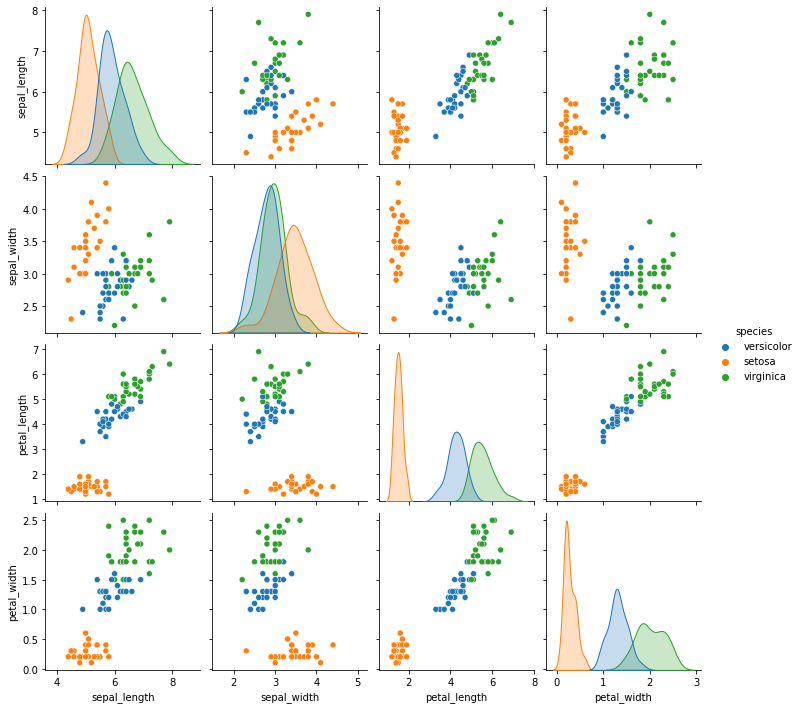

In [237]:
sns.pairplot(data = train, hue='species', vars= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

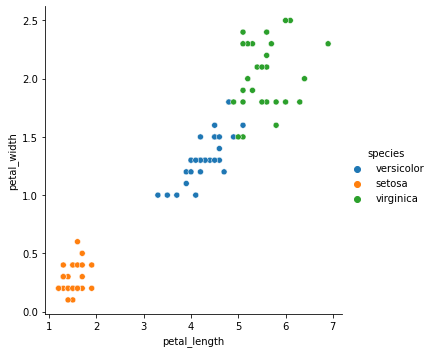

In [238]:
sns.relplot(x='petal_length', y='petal_width', data= train, hue='species')

In [239]:
melted = pd.melt(train.drop(columns = ['species_versicolor', 'species_virginica']), id_vars = 'species')
melted.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


<AxesSubplot:xlabel='variable', ylabel='value'>

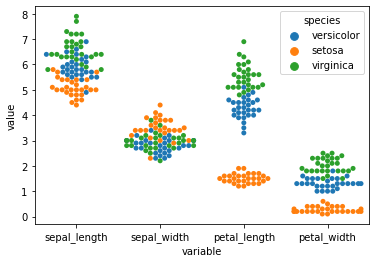

In [240]:
sns.swarmplot(data = melted, x = 'variable', y = 'value', hue = 'species')

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance

In [242]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica,sepal_area
79,5.7,2.6,3.5,1.0,versicolor,1,0,14.82
36,5.5,3.5,1.3,0.2,setosa,0,0,19.25
133,6.3,2.8,5.1,1.5,virginica,0,1,17.64
95,5.7,3.0,4.2,1.2,versicolor,1,0,17.10
18,5.7,3.8,1.7,0.3,setosa,0,0,21.66


In [246]:
virginica = train[train.species == 'virginica']
setosa = train[train.species == 'setosa']

In [248]:
virginica.sepal_area.var(), setosa.sepal_area.var()

(10.803174074074073, 10.327110582010585)

<AxesSubplot:xlabel='sepal_area', ylabel='Count'>

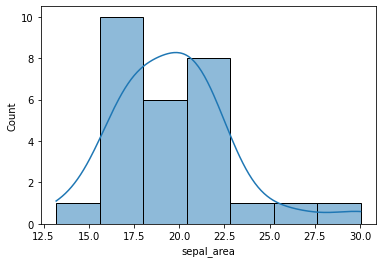

In [250]:
sns.histplot(data = virginica, x = 'sepal_area', kde = True)

<AxesSubplot:xlabel='sepal_area', ylabel='Count'>

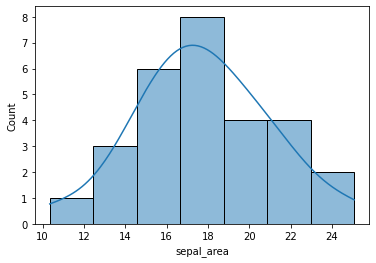

In [251]:
sns.histplot(data = setosa, x = 'sepal_area', kde = True)

In [ ]:
null: the sepal area is not signficantly different in virginica compared to setosa
alternative hypothesis: the sepal area is signficantly different in virginica compared to setosa

In [255]:
t, p = stats.ttest_ind(virginica.sepal_area, setosa.sepal_area, equal_var=True)
t, p 

(2.226624411702259, 0.030164291645584197)

In [256]:
if p < alpha:
    print('Reject the null')

Reject the null


In [115]:
def prep_iris(df):
    columns_to_drop = ['species_id', 'Unnamed: 0', 'measurement_id']
    df = df.drop(columns = columns_to_drop)
    df = df.rename(columns = {'species_name':'species'}, inplace = True)
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])
    df = pd.concat([df, dummy_df], axis=1)
    return df
    

In [116]:
df = acquire.get_iris_data()
df.head()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


In [117]:
prepped_iris = prep_iris(df)
prepped_iris

TypeError: 'NoneType' object is not subscriptable

In [257]:
def clean_titanic_data(df):
    '''
    Takes in a titanic dataframe and returns a cleaned dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: clean_df - a dataframe with the cleaning operations performed on it
    '''
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['embarked', 'class', 'passenger_id', 'deck', 'Unnamed: 0']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])   

In [273]:
df = acquire.get_titanic_data()
clean_df = clean_titanic_data(df)
clean_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [259]:
def impute_age(train, validate, test):
    '''
    Imputes the mean age of train to all three datasets
    '''
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']] = imputer.transform(validate[['age']])
    test[['age']] = imputer.transform(test[['age']])
    return train, validate, test

In [260]:
def prep_titanic_data(df): 
    df = clean_titanic_data(df)
    train, test = train_test_split(df,
                               train_size = 0.8,
                               stratify = df.survived,
                               random_state=1234)
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=1234)
    train, validate, test = impute_age(train, validate, test)
    return train, validate, test

In [261]:
df_titanic = acquire.get_titanic_data()
train, validate, test = prep_titanic_data(df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


<AxesSubplot:xlabel='pclass', ylabel='fare'>

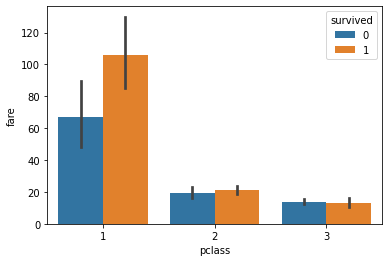

In [267]:
sns.barplot(data=train, x='pclass',y='fare', hue='survived')

In [272]:
sns.barplot(data=train, x='survived',y='sex')

ValueError: Could not interpret input 'sex'

In [33]:
from acquire import get_telco_data

In [34]:
df = get_telco_data()
df.head()


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [38]:
df[df.total_charges == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1731,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
1906,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2025,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
2176,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
2250,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
2855,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
3052,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
3118,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
4054,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check


In [40]:
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [42]:
df['total_charges'] = df.total_charges.astype(float)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   customer_id               7032 non-null   object 
 4   gender                    7032 non-null   object 
 5   senior_citizen            7032 non-null   int64  
 6   partner                   7032 non-null   object 
 7   dependents                7032 non-null   object 
 8   tenure                    7032 non-null   int64  
 9   phone_service             7032 non-null   object 
 10  multiple_lines            7032 non-null   object 
 11  online_security           7032 non-null   object 
 12  online_backup             7032 non-null   object 
 13  device_protection         7032 non-null   object 
 14  tech_sup

In [44]:
columns_to_drop = ['internet_service_type_id', 'payment_type_id', 'contract_type_id']
df = df.drop(columns = columns_to_drop)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [45]:


df['is_female'] = df['gender'].map({'Female': 1, 'Male': 0})
df['has_partner'] = df['partner'].map({'Yes': 1, 'No': 0})
df['has_dependents'] = df['dependents'].map({'Yes': 1, 'No': 0})
df['has_phone_service'] = df['phone_service'].map({'Yes': 1, 'No': 0})
df['has_paperless_billing'] = df['paperless_billing'].map({'Yes': 1, 'No': 0})
df['has_churned'] = df['churn'].map({'Yes': 1, 'No': 0})
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,contract_type,internet_service_type,payment_type,is_female,has_partner,has_dependents,has_phone_service,has_paperless_billing,has_churned
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,No,One year,DSL,Mailed check,1,0,0,1,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,1,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,No,Two year,DSL,Mailed check,0,1,1,1,0,0


In [11]:
# dummy_df = pd.get_dummies(df[['multiple_lines', \
#                               'online_security', \
#                               'online_backup', \
#                               'device_protection', \
#                               'tech_support', \
#                               'streaming_tv', \
#                               'streaming_movies', \
#                               'contract_type', \
#                               'internet_service_type', \
#                               'payment_type']], dummy_na=False, \
#                               drop_first=False)

In [46]:
dummy_df = pd.get_dummies(df[['gender', 'partner', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=False)
dummy_df.head()  

,gender_Female,gender_Male,partner_No,partner_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,0,1,1,0,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,1,0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [47]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [21]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
is_female,7043.0,0.495244,0.500013,0.00,0.0,0.00,1.00,1.00
has_partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
has_dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
has_phone_service,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
has_paperless_billing,7043.0,0.592219,0.491457,0.00,0.0,1.00,1.00,1.00
has_churned,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00
gender_Female,7043.0,0.495244,0.500013,0.00,0.0,0.00,1.00,1.00


In [82]:
def prep_telco(df):
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    df['total_charges'] = df.total_charges.astype(float)
    columns_to_drop = ['Unnamed: 0','internet_service_type_id', 'payment_type_id', 'contract_type_id']
    df = df.drop(columns = columns_to_drop)
    df['is_female'] = df['gender'].map({'Female': 1, 'Male': 0})
    df['has_partner'] = df['partner'].map({'Yes': 1, 'No': 0})
    df['has_dependents'] = df['dependents'].map({'Yes': 1, 'No': 0})
    df['has_phone_service'] = df['phone_service'].map({'Yes': 1, 'No': 0})
    df['has_paperless_billing'] = df['paperless_billing'].map({'Yes': 1, 'No': 0})
    df['has_churned'] = df['churn'].map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(df[['gender', 'partner', 'phone_service', \
                                  'multiple_lines', 'online_security', \
                                  'online_backup', 'tech_support', \
                                  'streaming_tv', 'streaming_movies', \
                                  'paperless_billing', 'churn', 'contract_type', \
                                  'internet_service_type', 'payment_type']], \
                              dummy_na=False, drop_first=False)
    df = pd.concat([df, dummy_df], axis=1)
    return df
 

In [83]:
from acquire import get_telco_data

In [84]:
df = get_telco_data()
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [85]:
df = prep_telco(df)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,1,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,1,0,0,0,1,0,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,1,0,0,0,0,0,1


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
is_female,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00
has_partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
has_dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
has_phone_service,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
has_paperless_billing,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.00
has_churned,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00
